In [114]:
# how to define an Einstein de Sitter Universe (flat universe with $\Omega_L=0$)   
# The EdS model was particularly popular in the 1980s until late time acceleration was discovered in 1998
# The Einstein-de Sitter model is a good approximation to our universe in the redshhift range where
# matter dominates (after the radiation-dominated era but before dark energy becomes important).
from colossus.cosmology import cosmology
import numpy as np
from matplotlib import pylab as plt
from classcode.plot_utils import plot_pretty
import math
plot_pretty(dpi=300)
cosmo_eds= cosmology.setCosmology('eds')
print(cosmo_eds)

Cosmology "eds", flat = True, relspecies = False, 
    Om0 = 1.0000, OL0 = 0.0000, Ob0 = 0.0000, H0 = 70.00, sigma8 = 0.8200, ns = 1.0000, 
    Tcmb0 = 2.7255, Neff = 3.0460, PL = False, PLn = 0.0000


In [115]:
# define a vector of cosmological parameters    
my_cosmo_lcdm = {'flat': True, 'H0': 73.0, 'Om0': 0.238, 'Ob0': 0.045714, 'sigma8': 0.74, 'ns': 0.951}
my_cosmo_eds = {'flat': True, 'H0': 73.0, 'Om0': 1, 'Ob0': 0.045714, 'sigma8': 0.74, 'ns': 0.951}
#my_cosmo_lcdm = {'flat': True, 'H0': 73.0, 'Om0': 0.238, 'Ob0': 0.045714, 'sigma8': 0.74, 'ns': 0.951}
my_cosmo_lcdm2 = {'flat': True, 'H0': 73.0, 'Om0': 0.6, 'Ob0': 0.045714, 'sigma8': 0.74, 'ns': 0.951}
my_cosmo_lcdm3 = {'flat': True, 'H0': 73.0, 'Om0': 0.1, 'Ob0': 0.045714, 'sigma8': 0.74, 'ns': 0.951}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo_lcdm)
cosmo2 = cosmology.setCosmology('eds', my_cosmo_eds)
cosmo3 = cosmology.setCosmology('my_cosmo', my_cosmo_lcdm2)
cosmo4 = cosmology.setCosmology('my_cosmo', my_cosmo_lcdm3)
#cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)

3031
0.47000000000000003
0.48


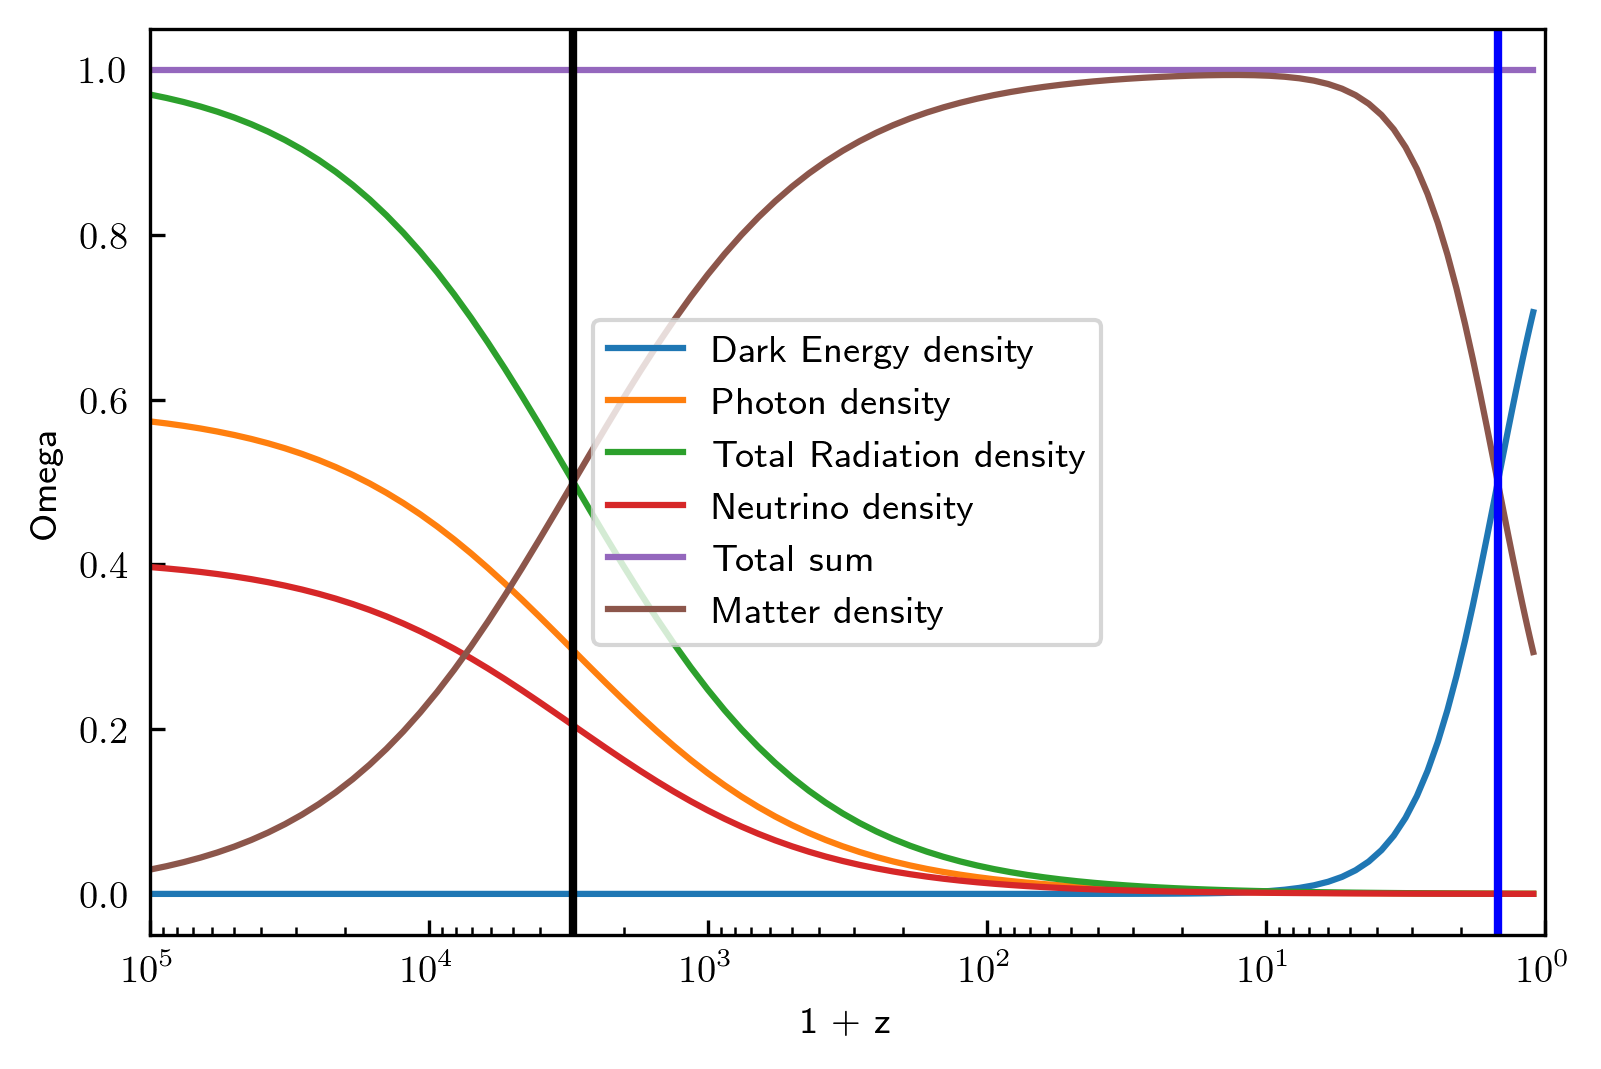

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
152.257625665 Mpc


In [116]:

Om = cosmo.Om         # DM and baryons
OL = cosmo.OL         # dark energy
Ogamma = cosmo.Ogamma # photons
Or = cosmo.Or         # Total radiation
Onu = cosmo.Onu       # Neutrinos
#np.arange(0.0, 1000.0, 0.1)
for i in range (1, 100000, 1): 
  if math.fabs(Or(i) - Om(i)) < 0.0001: 
    print (i)
    
for i in range (1, 100000, 1):
  z = 0.01*i   
  if math.fabs(Om(z) - OL(z)) < 0.01:
    print (z)
z = np.logspace(-1.0,5.0,num=100,base=10.0)

fig, ax = plt.subplots()

plt.plot(1+z,OL(z),label = 'Dark Energy density')
plt.plot(1+z,Ogamma(z),label = 'Photon density')
plt.plot(1+z,Or(z),label = 'Total Radiation density')
plt.plot(1+z,Onu(z),label = 'Neutrino density')
plt.plot(1+z,Om(z) + OL(z) + Ogamma(z) + Onu(z)  ,label = 'Total sum')
plt.plot(1+z,Om(z),label='Matter density')
plt.axvline(x=3032, linewidth=2, color='k')
plt.axvline(x=1.47, linewidth=2, color='b')
plt.xlabel('1 + z')
plt.ylabel('Omega')
legend = ax.legend()
plt.xlim(100000, 1)  # decreasing time
plt.xscale('log')
plt.show()
sh = cosmo.soundHorizon()

# This total should sum to 1

print(Om(z)+OL(z)+Or(z))
print (sh , 'Mpc')

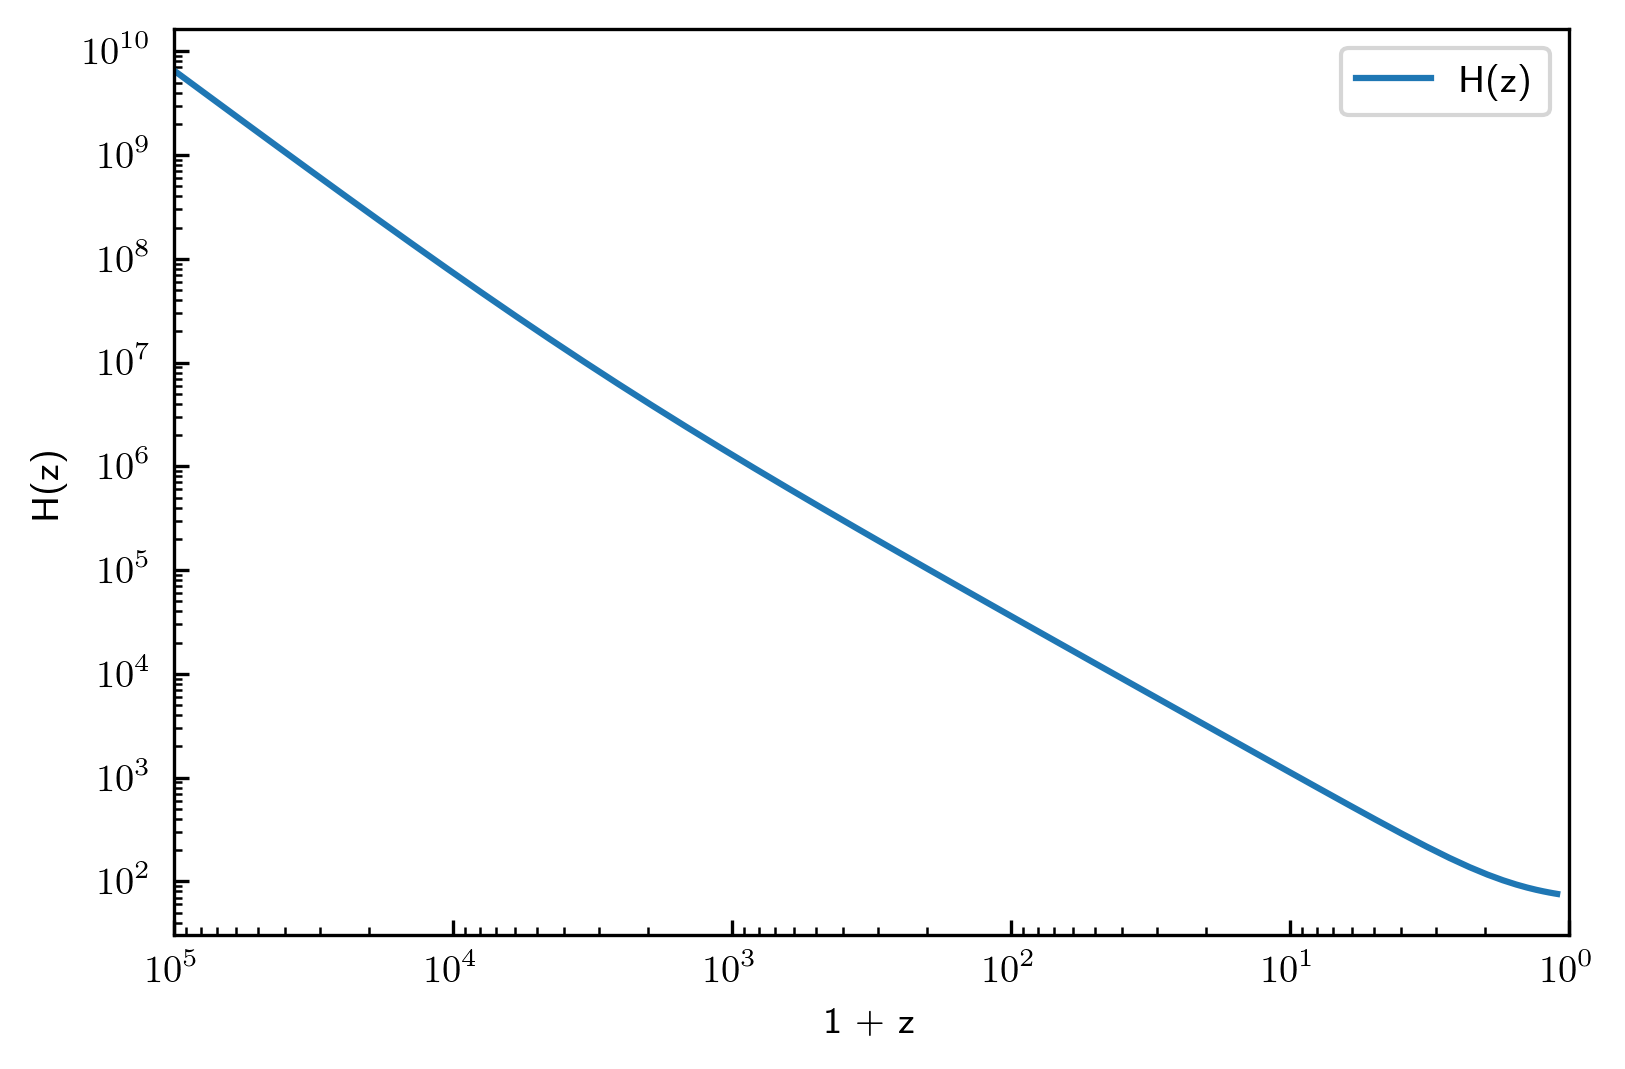

In [117]:
z = np.logspace(-1.0,5,num=50,base=10.0)
Hz = cosmo.Hz
Ez = cosmo.Ez

fig, ax = plt.subplots()

plt.plot(1+z,Hz(z),label = 'H(z)')
plt.xlabel('1 + z')
plt.ylabel('H(z)')
legend = ax.legend()

plt.xlim(100000, 1)  # decreasing time
plt.xscale('log')
plt.yscale('log')
plt.show()

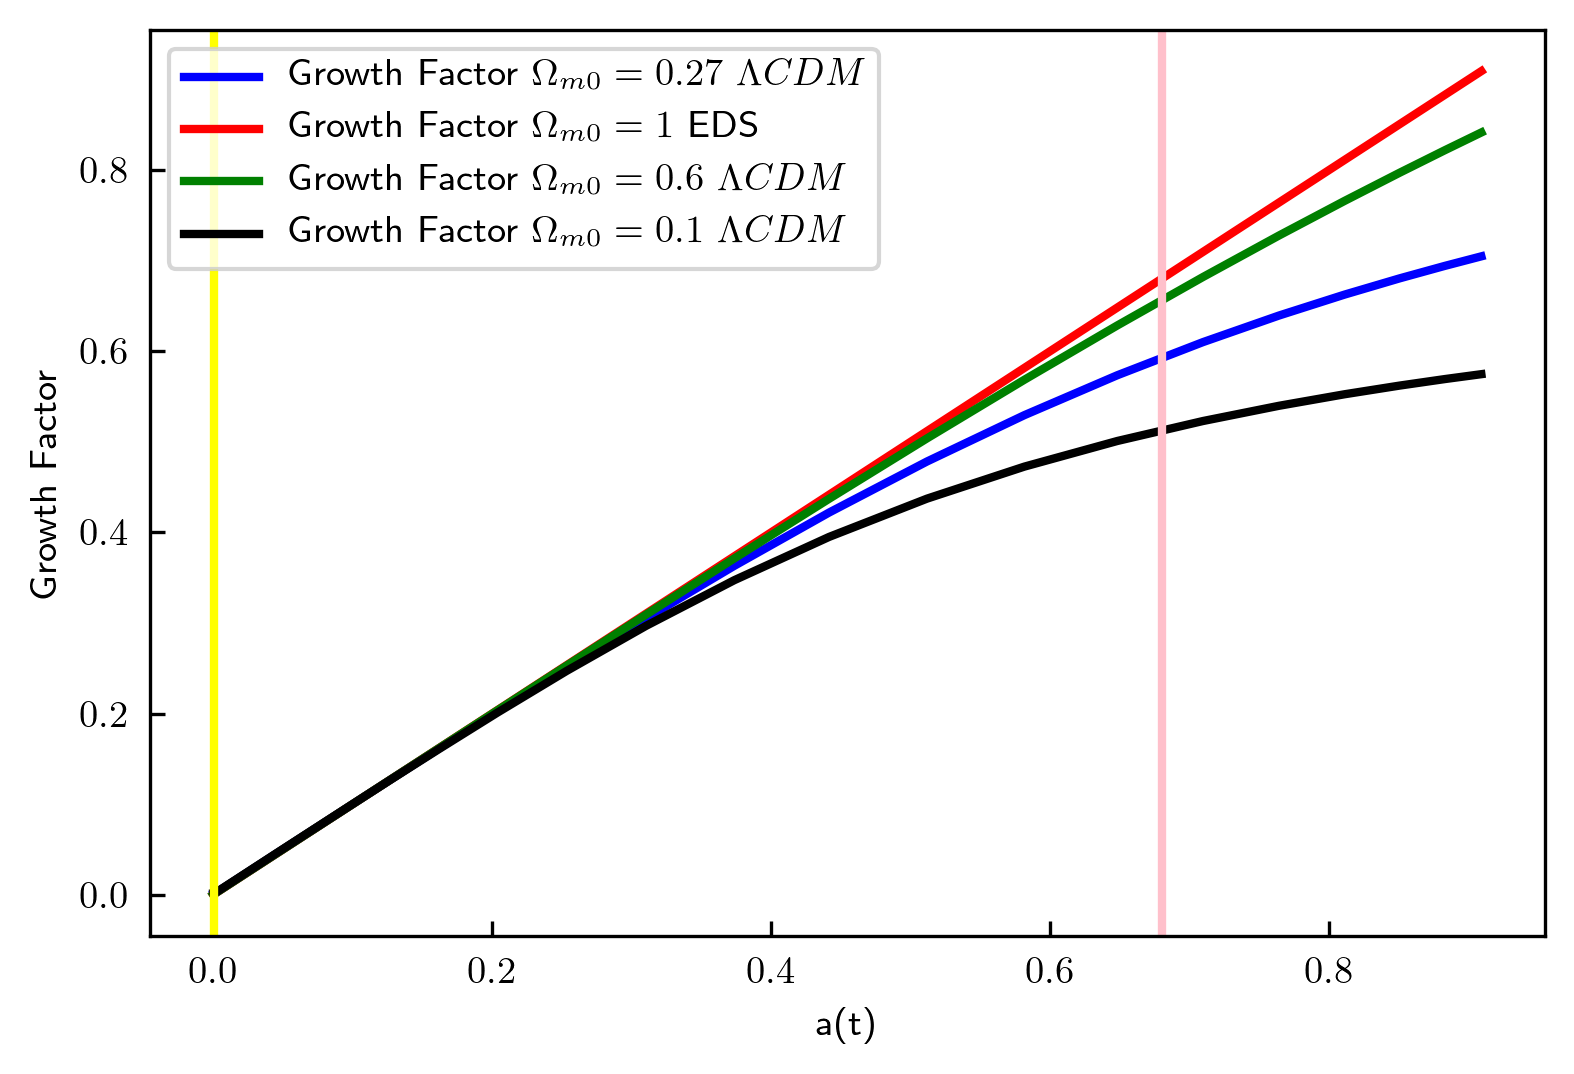

In [118]:
#plt.xscale('log')
#plt.yscale('log')
plt.plot(1/(1+z), cosmo.growthFactorUnnormalized(z), c='blue', linewidth=2., 
         label= r'Growth Factor $\Omega_{m0} = 0.27 $ $\Lambda CDM$')
#axvline(x=linewidth=4)
plt.plot(1/(1+z), cosmo2.growthFactorUnnormalized(z), c='red', linewidth=2., 
         label= r'Growth Factor $\Omega_{m0} = 1 $ EDS')
plt.plot(1/(1+z), cosmo3.growthFactorUnnormalized(z), c='green', linewidth=2., 
         label= r'Growth Factor $\Omega_{m0} = 0.6$ $\Lambda CDM$')
plt.plot(1/(1+z), cosmo4.growthFactorUnnormalized(z), c='k', linewidth=2., 
         label= r'Growth Factor $\Omega_{m0} = 0.1$ $\Lambda CDM$')
plt.axvline(x=1/3032., linewidth=2, color='yellow')
plt.axvline(x=1/1.47, linewidth=2, color='pink')
plt.xlabel('a(t)')
plt.ylabel('Growth Factor')

plt.legend()
plt.show()

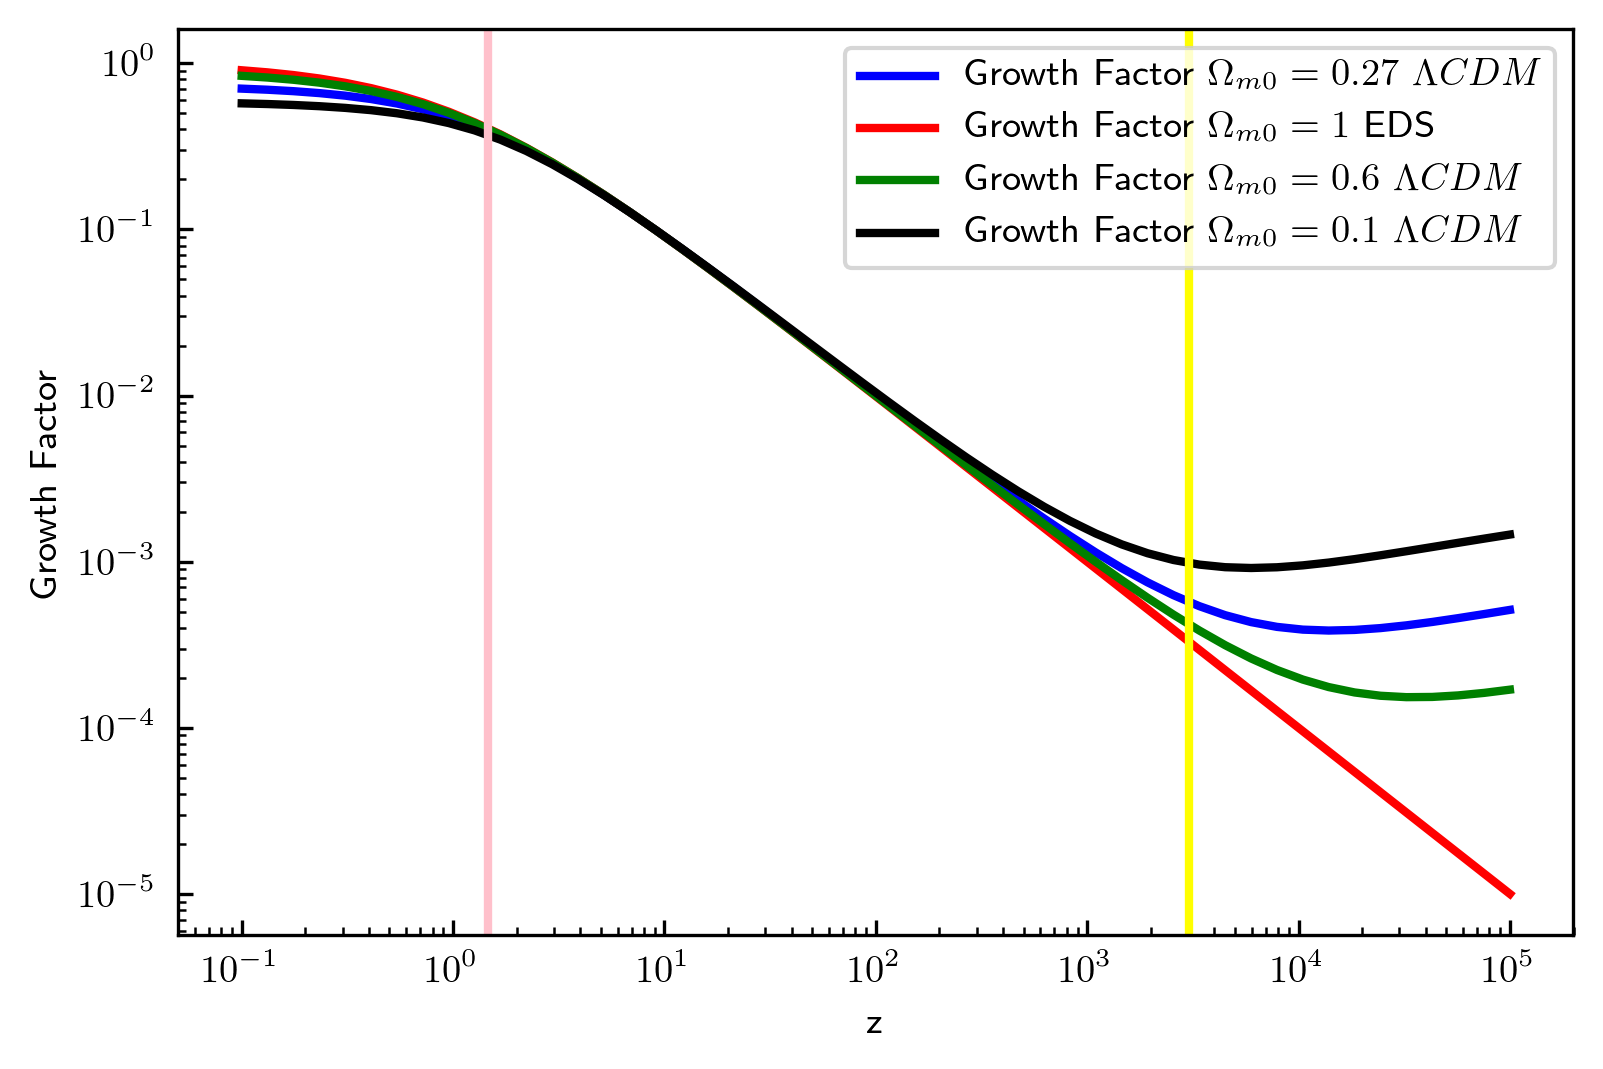

In [119]:
plt.xscale('log')
plt.yscale('log')
plt.plot((z), cosmo.growthFactorUnnormalized(z), c='blue', linewidth=2., 
         label= r'Growth Factor $\Omega_{m0} = 0.27 $ $\Lambda CDM$')
#axvline(x=linewidth=4)
plt.plot((z), cosmo2.growthFactorUnnormalized(z), c='red', linewidth=2., 
         label= r'Growth Factor $\Omega_{m0} = 1 $ EDS')
plt.plot((z), cosmo3.growthFactorUnnormalized(z), c='green', linewidth=2., 
         label= r'Growth Factor $\Omega_{m0} = 0.6$ $\Lambda CDM$')
plt.plot((z), cosmo4.growthFactorUnnormalized(z), c='k', linewidth=2., 
         label= r'Growth Factor $\Omega_{m0} = 0.1$ $\Lambda CDM$')
plt.axvline(x=3032., linewidth=2, color='yellow')
plt.axvline(x=1.47, linewidth=2, color='pink')
plt.xlabel('z')
plt.ylabel('Growth Factor')

plt.legend()
plt.show()